# Spotify Data Analysis Project

## Executive Summary

I performed k-means clustering on my most listened to Spotify playlist. I ended up with 3 clusters, which can be visualized in a Tableau dashboard. The most important features that determined a song's cluster were modality (major/minor key), time signature, valence and duration. 

Clusters 1 was the largest cluster with 311 songs. It was characterized by popular artists such as Taylor Swift, Doja Cat, and Noah Kahan. Notably, every song in this cluster was in major key and had a time signature of 4. 

Cluster 2 was the smallest, with only 39 songs. The most common artists in this cluster were WILLOW, Lana Del Rey, and Harry Styles. Songs in cluster 2, were 10 seconds shorter than the median song length for the entire playlist and had lower valence. The variable that sets cluster 2 apart is time signature. Clusters 1 and 3 are predomiantly made of songs with a time signature 4, whereas songs in cluster 2 are almost entirely in time signature 3.

Cluster 3 is second largest cluster with 189 songs, and the most common artists were Lana Del Rey, Tyler the Creator, and SZA. Cluster 3 is remarkably similar to cluster 1. Both clusters had similar durations and valence and were predominantly made of time signature 4 songs. The variable that differentiates these two clusters is modality. Every song in cluster 1 was in major key and every song in cluster 2 was in minor key.

## Getting the Data

In [1]:
## Read in packages

import spotipy

from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd

In [2]:
## Setting up API Authorization

#### Replace cid and secret and with actual client id and client secret from spotify web developer site
cid = "1234"
secret = "1234"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [3]:
## Get data from spotify by making function

def get_playlist(creator, playlist_id):
    
    #step1

    playlist_features_list = ["artist", "album","track_name", "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2
   
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        # playlist_features["popularity"] = track["track"]["popularity"] # Don't need popularity, but was practice using the API
    
    
        # Get audio features for each track
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]

        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #Step 3
        
    return playlist_df

In [4]:
# Test function on desired playlist

get_playlist("spotify", "5Qy0DKtxm0VMscjzqOJqr1") # playlist_id is uri, comes from url in web browser


,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Henry Najem,Pose,Pose,6EGZn9vwD0QPtdaI7GLoB2,0.878,0.4210,9,-14.178,1,0.3520,0.230000,0.0981,0.8390,119.962,146000,4
1,HoodRich Pablo Juan,Designer Drugz 3,We Don't Luv Em,7Ay41oJQbfdIrhfNy46PuD,0.861,0.6270,4,-6.438,1,0.3420,0.000000,0.1120,0.9290,139.989,186096,4
2,boy pablo,Roy Pablo,"Dance, Baby!",5EV4bGHxVN0kHpcAFvgnTt,0.602,0.6010,9,-8.521,1,0.0411,0.004600,0.3120,0.8560,122.017,198000,4
3,Lorde,Yellow Flicker Beat (From The Hunger Games: Mo...,Yellow Flicker Beat,0Nf53RDPZEjFrQE4B5n6Vf,0.585,0.6100,1,-8.388,1,0.0353,0.000314,0.1130,0.0597,94.969,232507,4
4,awfultune,i met sarah in the bathroom,i met sarah in the bathroom,0mr8FAnN9X70p5KRUwMIJx,0.675,0.4080,0,-10.861,1,0.1420,0.000714,0.1600,0.2290,90.111,121375,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,SZA,Good Days,Good Days,3YJJjQPAbDT7mGpX3WtQ9A,0.436,0.6550,1,-8.370,0,0.0583,0.000008,0.6880,0.4120,121.002,279204,4
95,Raveena,Headaches,Headaches,4MNu1bSmyV3S4Y2MJMGrrP,0.442,0.5280,10,-9.269,1,0.0562,0.029000,0.0944,0.2330,132.932,311537,4
96,Masego,Lady Lady,Tadow,51rPRW8NjxZoWPPjnRGzHw,0.704,0.4870,9,-6.407,0,0.0604,0.000086,0.1110,0.3130,121.726,301893,4
97,Sergei Prokofiev,Prokofiev: Romeo & Juliet,"Romeo and Juliet, Op. 64 / Act 1: Dance Of The...",2LiWNkeUOAeibGxJKxmjsD,0.199,0.0677,0,-20.879,1,0.0390,0.738000,0.2250,0.1450,78.866,307827,3


### Getting more data
The spotify API only allows users to grab 100 songs from a playlist at once (see above). The playlist I want to anlayze has over 500 songs. 

On spotify, I split my original playlist into separate playlists that each contain 100 songs. 

To get data from all of those playlists, I created a for loop that interates through all of the playlists and combines the data into one dataframe.

In [28]:
playlist_ids = ['2qfZuK60XtYSUSkxrPFrmH', '1pcO6k5gNXVuyXSKammwoJ', '5RdjchvSYHR3iWNLvwAncP','5f1u8D4FT4KkkVBk7PnYTC', '4n6YBGkmgUqN85R2jmhMem', '6pZ0H2xbhVzU4EuKCSIkw9']

all_100_song_chunks = []

for playlist in playlist_ids:
    playlist_series = get_playlist("spotify", playlist)  # Run the function, function output is saved to variable as a series
    playlist_df = pd.DataFrame(playlist_series) # convert the series to a pandas df
    all_100_song_chunks.append(playlist_df) # add each playlist data to a list

screening_playlist = pd.concat(all_100_song_chunks, ignore_index=True) # combine playlist data for multiple playlists into one dataframe 

screening_playlist
    

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,Cupid De Locke - Remastered 2012,7zwwvrJAWGjfc9wFD3bVzZ,0.400,0.6770,8,-10.971,1,0.0336,0.396,0.1190,0.393,183.614,170280,4
1,saturra,lovergirl,lovergirl,7G8NW1IfiuHgvJ8UfzyOWF,0.427,0.3120,1,-18.109,0,0.0359,0.166,0.1110,0.820,183.838,135883,4
2,Noah Kahan,Stick Season,Stick Season,0mflMxspEfB0VbI1kyLiAv,0.662,0.4880,9,-6.894,1,0.0682,0.0,0.1020,0.817,117.913,182347,4
3,Taylor Swift,1989 (Taylor's Version),New Romantics (Taylor's Version),2vPMoMDXxu9uX1igWZmXSG,0.651,0.8550,5,-5.959,1,0.0538,0.00001,0.0759,0.698,121.980,230178,4
4,SiR,Chasing Summer,You Can't Save Me,1OykBmq3vmMSEOQShNIBLv,0.623,0.5840,0,-7.902,1,0.1200,0.000168,0.1190,0.546,157.986,174947,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,SZA,Good Days,Good Days,3YJJjQPAbDT7mGpX3WtQ9A,0.436,0.6550,1,-8.370,0,0.0583,0.000008,0.6880,0.412,121.002,279204,4
526,Raveena,Headaches,Headaches,4MNu1bSmyV3S4Y2MJMGrrP,0.442,0.5280,10,-9.269,1,0.0562,0.029,0.0944,0.233,132.932,311537,4
527,Masego,Lady Lady,Tadow,51rPRW8NjxZoWPPjnRGzHw,0.704,0.4870,9,-6.407,0,0.0604,0.000086,0.1110,0.313,121.726,301893,4
528,Sergei Prokofiev,Prokofiev: Romeo & Juliet,"Romeo and Juliet, Op. 64 / Act 1: Dance Of The...",2LiWNkeUOAeibGxJKxmjsD,0.199,0.0677,0,-20.879,1,0.0390,0.738,0.2250,0.145,78.866,307827,3


In [29]:
## Output to csv
screening_playlist.to_csv("screening_playlist.csv")

In [6]:
# Make sure there are no duplicate songs, should be 531 songs

if len(pd.unique(screening_playlist['track_id'])) <= 531:
    print("There are no duplicates")
else:
    print("There are duplicates")

There are no duplicates


## Understanding Audio Features

### [Variable Descriptions](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

1. danceability (float): How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


2. duration_ms (integer): duration of song in miliseconds


3. energy (float): measure from 0.0 to 1.0 that represents a perceptual measure of intensity and activity. 



4. key (integer): key the track is in 



5. liveness (float): presence of an audience in the recording



6. tempo (float): estimated tempo of a song in BPM

7. time_signature (integer): estimated time signature, range: 3-7


8. valence (float): measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track


9. speechiness (float): detects the presence of spoken words in a track, range: 0-1


10. mode (categorical): indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. 


11. loudness (float): overall loudness of a track in decibels (dB)


12. instrumentalness (float): predicts whether a track contains no vocals


In [7]:
# Examine data
screening_playlist.info()

# artist, album, track_name, track_id are going to be dropped for clustering
# duration_ms should be integer
# instrumentalness should be a float
# key, mode, and time_signature are categorical
# all else floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            530 non-null    object 
 1   album             530 non-null    object 
 2   track_name        530 non-null    object 
 3   track_id          530 non-null    object 
 4   danceability      530 non-null    float64
 5   energy            530 non-null    float64
 6   key               530 non-null    object 
 7   loudness          530 non-null    float64
 8   mode              530 non-null    object 
 9   speechiness       530 non-null    float64
 10  instrumentalness  530 non-null    object 
 11  liveness          530 non-null    float64
 12  valence           530 non-null    float64
 13  tempo             530 non-null    float64
 14  duration_ms       530 non-null    object 
 15  time_signature    530 non-null    object 
dtypes: float64(7), object(9)
memory usage: 66.4+

In [30]:
# Convert variables to proper data types based on descriptions
screening_playlist[['mode','time_signature',"key"]] = screening_playlist[['mode','time_signature',"key"]].astype('category') 
screening_playlist["duration_ms"] = screening_playlist["duration_ms"].astype('int')
screening_playlist['instrumentalness'] = screening_playlist['instrumentalness'].astype(float)

screening_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   artist            530 non-null    object  
 1   album             530 non-null    object  
 2   track_name        530 non-null    object  
 3   track_id          530 non-null    object  
 4   danceability      530 non-null    float64 
 5   energy            530 non-null    float64 
 6   key               530 non-null    category
 7   loudness          530 non-null    float64 
 8   mode              530 non-null    category
 9   speechiness       530 non-null    float64 
 10  instrumentalness  530 non-null    float64 
 11  liveness          530 non-null    float64 
 12  valence           530 non-null    float64 
 13  tempo             530 non-null    float64 
 14  duration_ms       530 non-null    int64   
 15  time_signature    530 non-null    category
dtypes: category(3), float64(8)

## Data Exploration

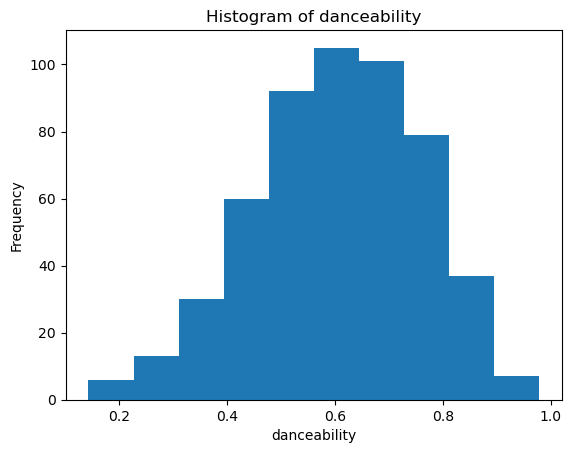

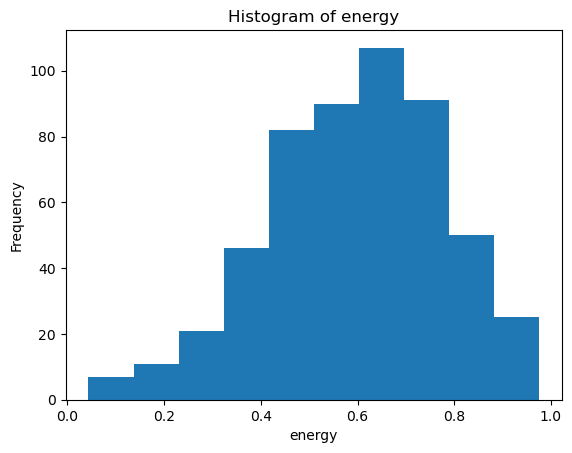

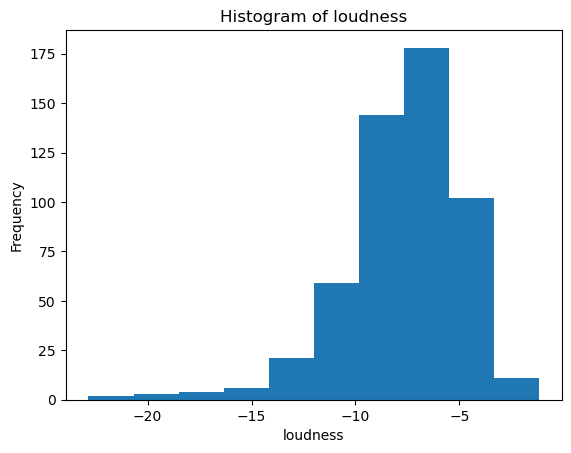

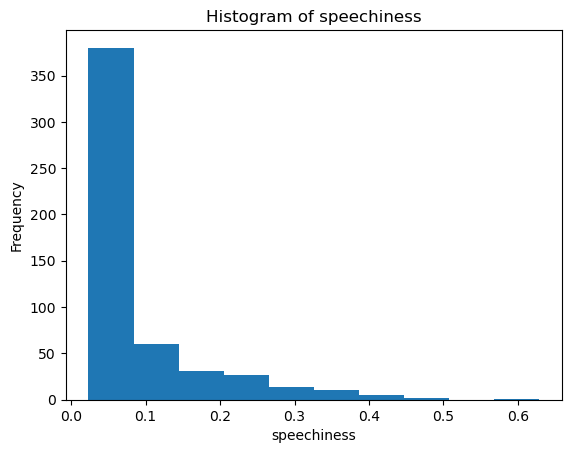

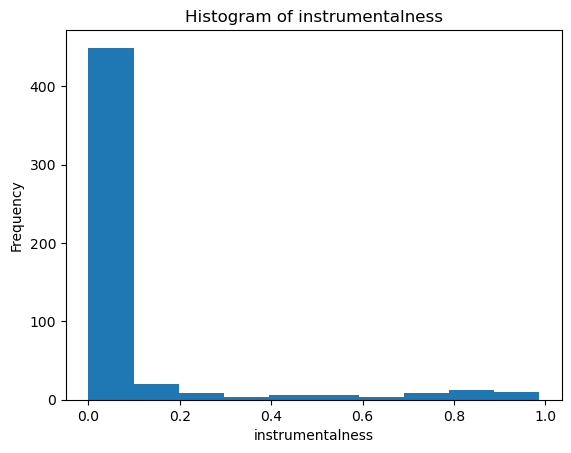

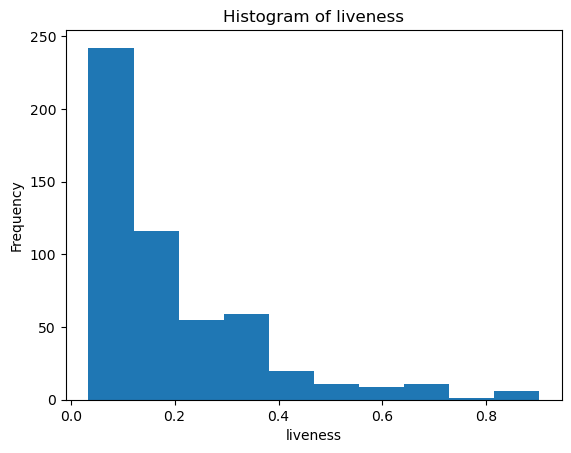

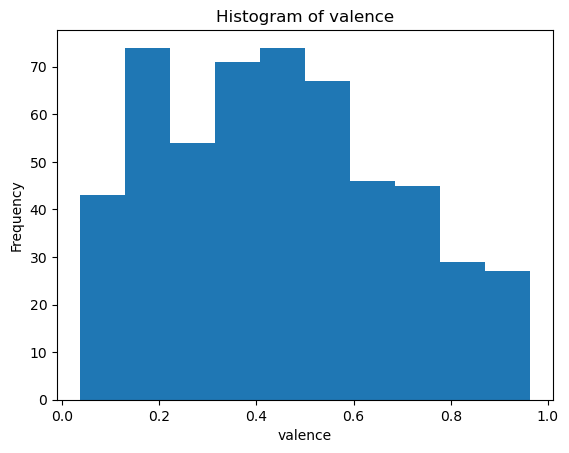

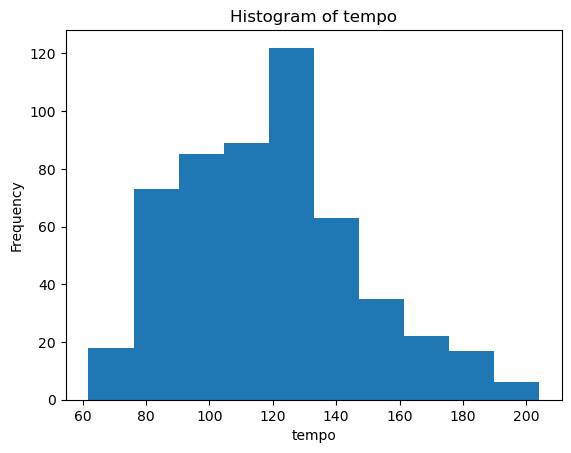

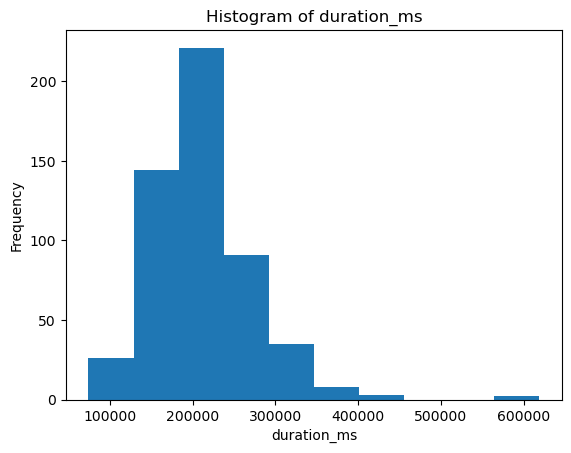

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a for loop to create a histogram of each numerical variable

for column in screening_playlist.columns:

    # Skip non-numeric columns
    if not pd.api.types.is_numeric_dtype(screening_playlist[column]):
        continue

    # Make histogram
    plt.hist(screening_playlist[column])
    plt.xlabel(column) # make x label the variable the loop is iterating through
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}') # make the title display the name of the varible by using {column}
    plt.show()

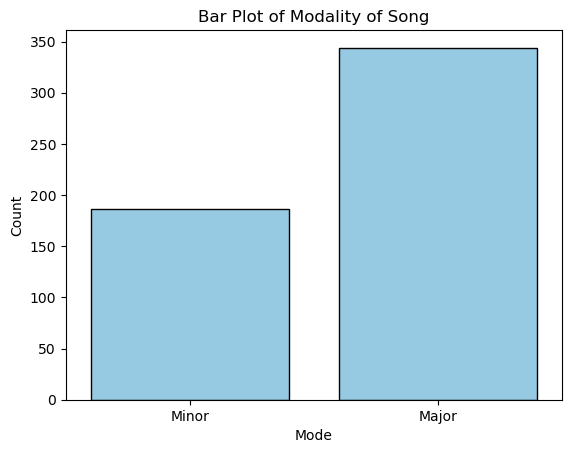

In [32]:
# Make plot of mode variable

sns.countplot(x='mode', data=screening_playlist, color = "#89CFF0", edgecolor='black')  # color is blue hex code that I looked up
plt.xlabel('Mode')
plt.ylabel('Count')
plt.title(f'Bar Plot of Modality of Song')
plt.xticks([0,1],['Minor',"Major"])
plt.show()


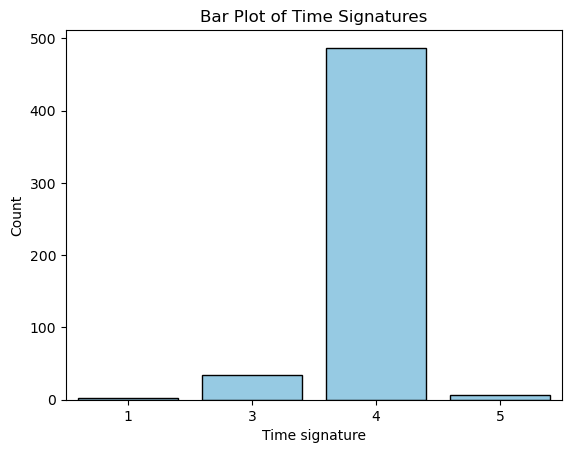

In [33]:
# Make plot of time signature variable

sns.countplot(x='time_signature', data=screening_playlist, color = "#89CFF0", edgecolor='black')  # color is blue hex code that I looked up
plt.xlabel('Time signature')
plt.ylabel('Count')
plt.title(f'Bar Plot of Time Signatures')
plt.show()

In [12]:
# Number of unique artists
len(pd.unique(screening_playlist['artist']))

322

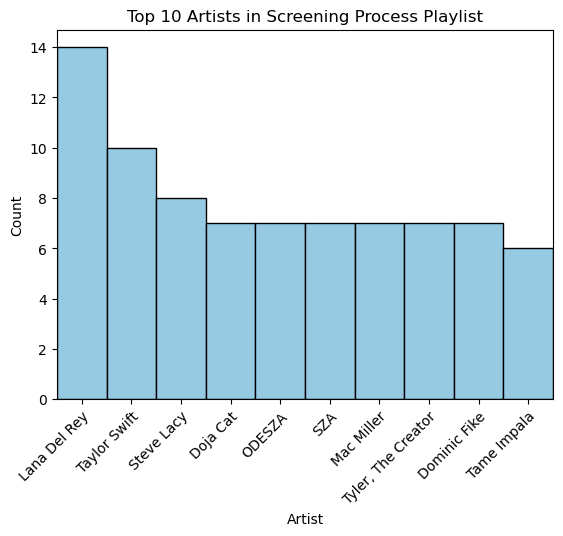

In [34]:
# Make plot of artists variable

artist_counts = screening_playlist['artist'].value_counts() # get counts
top_10_artists = artist_counts.head(10) # top 10 

sns.countplot(x='artist', data=screening_playlist, order=top_10_artists.index, color = "#89CFF0", edgecolor='black', width=1)  # top_10_artists.index makes graph focus on top 10
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Top 10 Artists in Screening Process Playlist')
plt.xticks(rotation = 45, ha='right',rotation_mode='anchor')

plt.show()


In [14]:
# Number of unique albums
len(pd.unique(screening_playlist['album']))

456

/Users/sophiagray/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


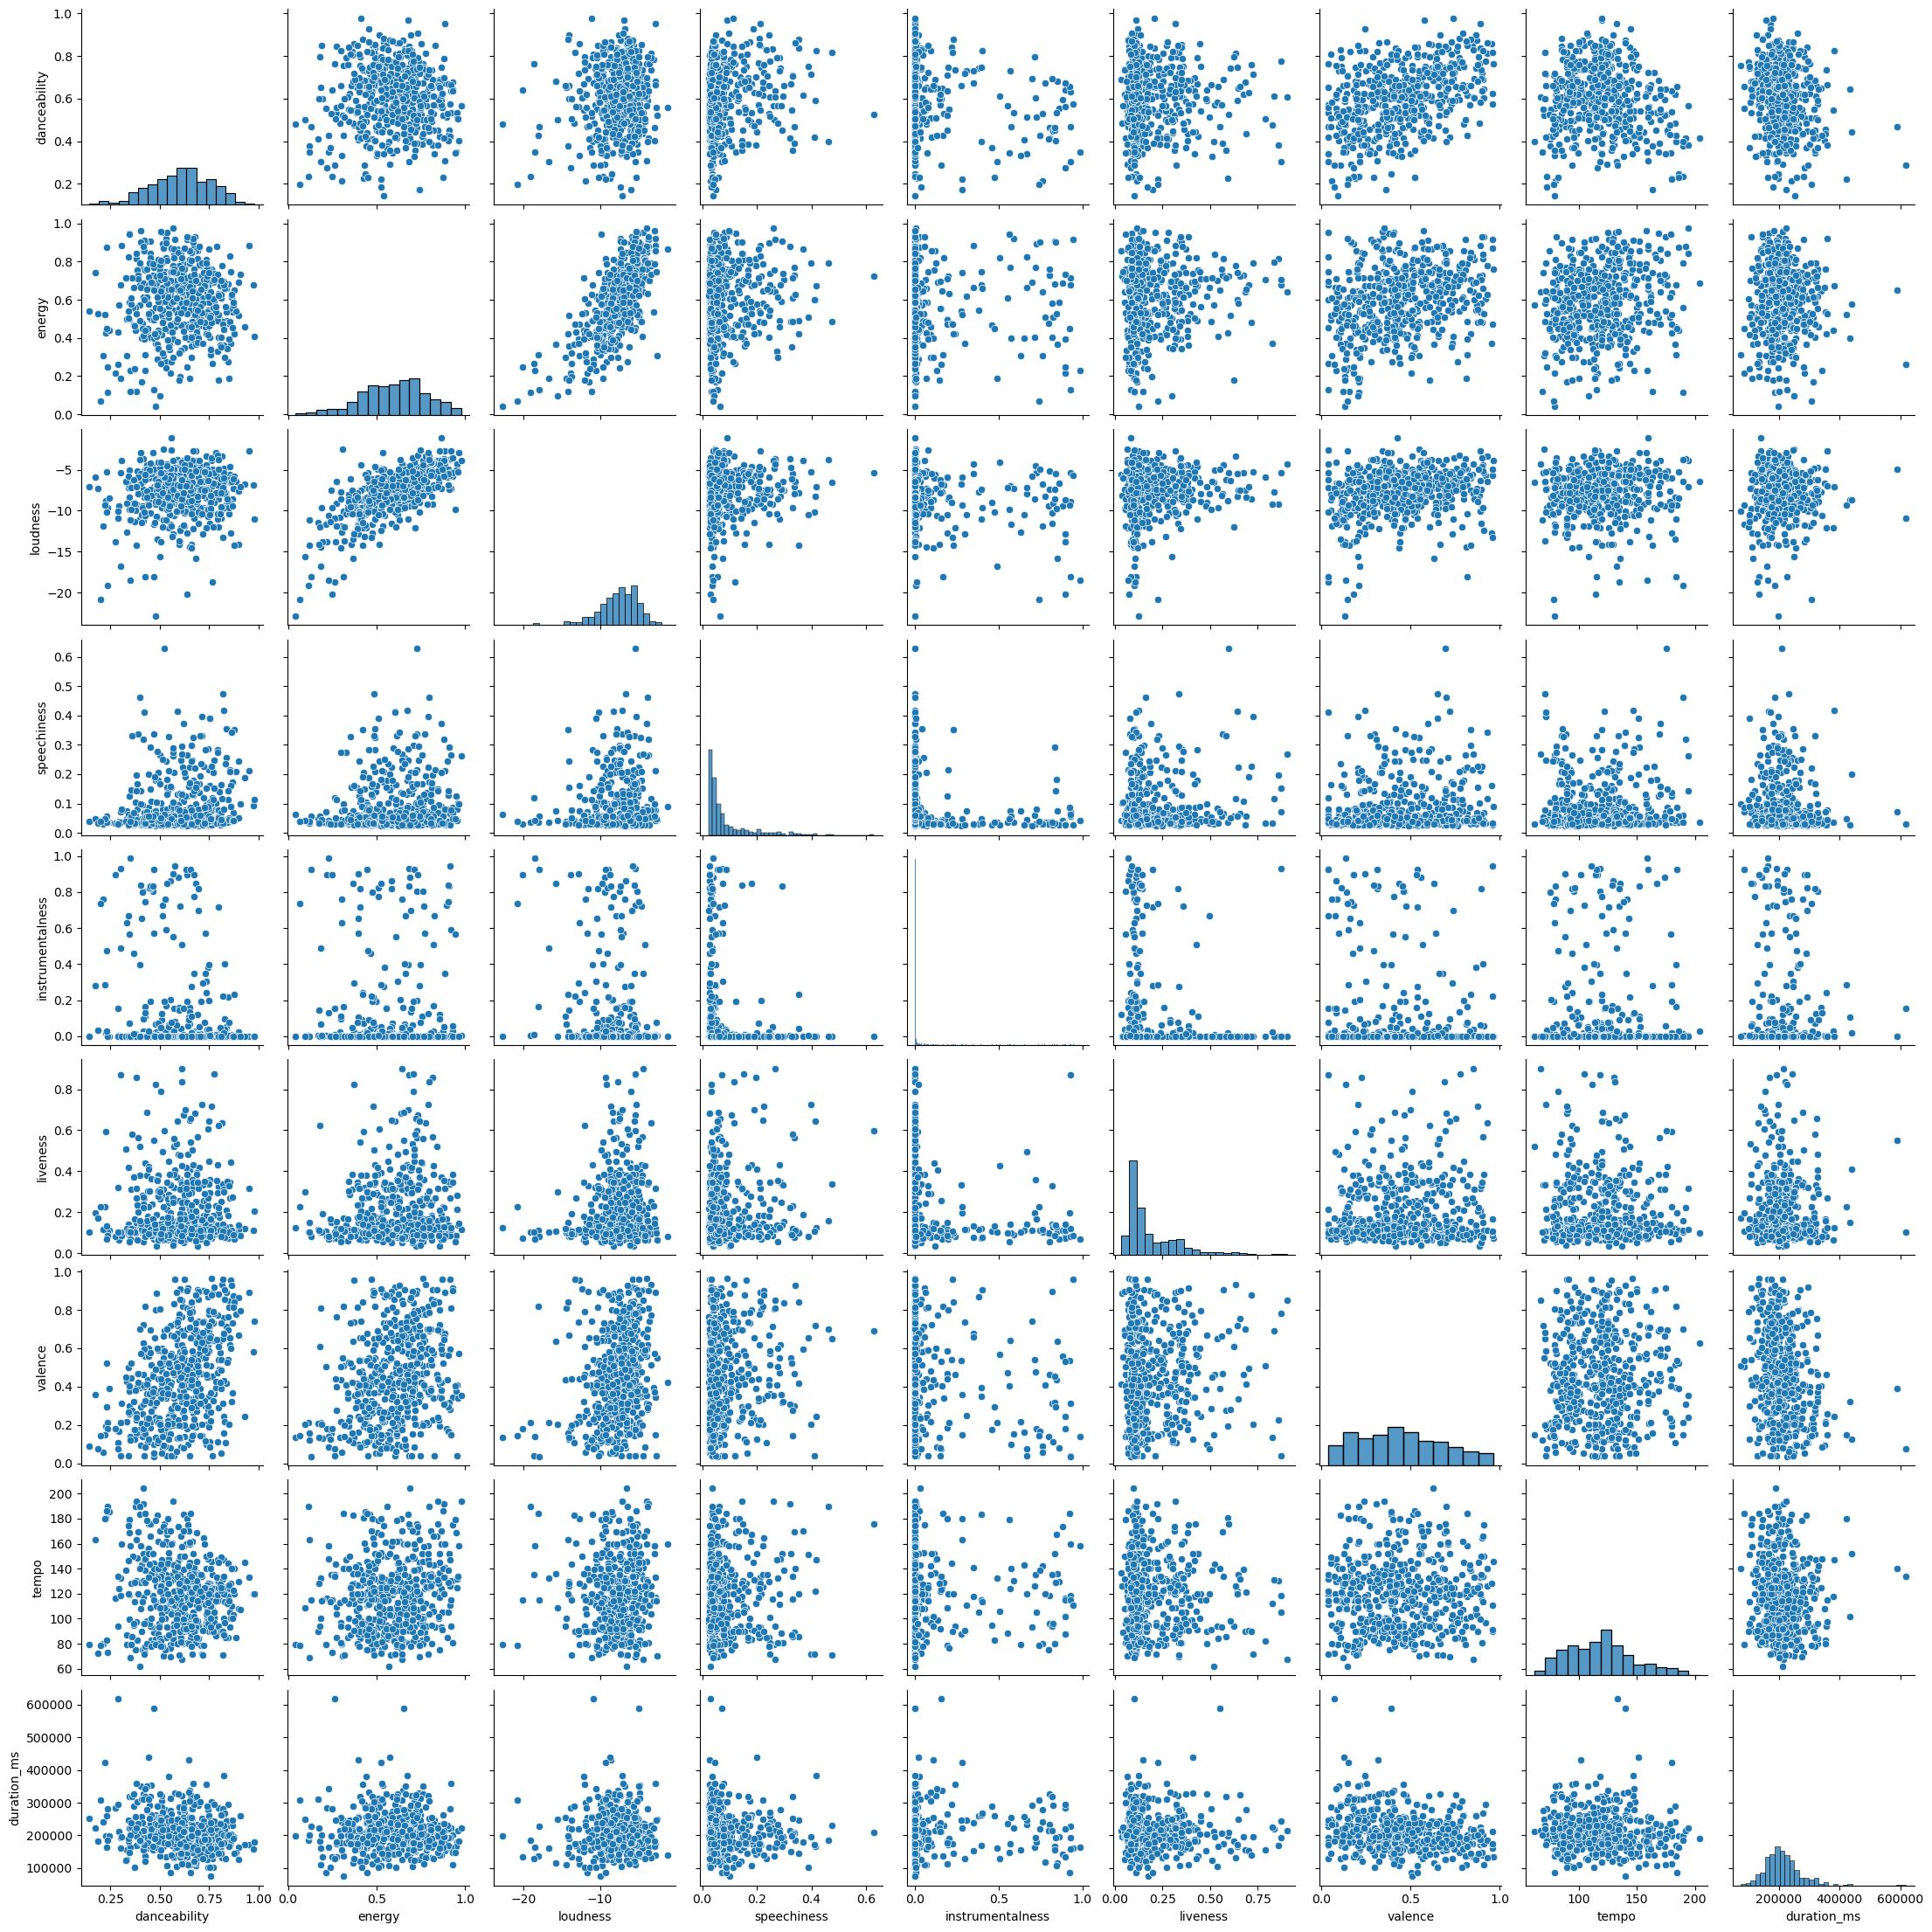

In [15]:
# Plot all numerical variables against each other
sns.pairplot(screening_playlist)
plt.show()

## K-Means Clustering

### Pre-processing

In [35]:
import numpy as np

## Note: I removed all song indentifying information and kept only the audio features
#### Dropped artist, track id, track name, and album

data = screening_playlist.drop(['artist', 'album', 'track_name', 'track_id'], axis=1)

## One-hot encode categorical variables
data = pd.get_dummies(data, columns=['mode','time_signature','key'],dtype="int")
data.head(5)

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,mode_0,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0.400,0.677,-10.971,0.0336,0.396000,0.1190,0.393,183.614,170280,0,...,0,0,0,0,0,0,1,0,0,0
1,0.427,0.312,-18.109,0.0359,0.166000,0.1110,0.820,183.838,135883,1,...,0,0,0,0,0,0,0,0,0,0
2,0.662,0.488,-6.894,0.0682,0.000000,0.1020,0.817,117.913,182347,0,...,0,0,0,0,0,0,0,1,0,0
3,0.651,0.855,-5.959,0.0538,0.000010,0.0759,0.698,121.980,230178,0,...,0,0,0,1,0,0,0,0,0,0
4,0.623,0.584,-7.902,0.1200,0.000168,0.1190,0.546,157.986,174947,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data.describe()

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,mode_0,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,...,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,0.603119,0.596236,-7.750121,0.086502,0.083899,0.201260,0.447639,118.936589,212350.486792,0.350943,...,0.116981,0.035849,0.066038,0.090566,0.067925,0.073585,0.073585,0.088679,0.067925,0.079245
std,0.152298,0.180130,2.869273,0.085927,0.217812,0.158465,0.235752,28.089432,60072.604029,0.477716,...,0.321701,0.186089,0.248583,0.287262,0.251854,0.261341,0.261341,0.284549,0.251854,0.270376
min,0.144000,0.043600,-22.849000,0.023100,0.000000,0.034000,0.036200,61.859000,74304.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.504250,0.474000,-9.118750,0.035400,0.000000,0.099275,0.246250,95.905500,174292.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.612000,0.610500,-7.340000,0.049550,0.000084,0.127000,0.429500,118.774500,206907.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.713750,0.721250,-5.755000,0.095550,0.011200,0.269000,0.625750,134.922250,239230.250000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.979000,0.976000,-1.148000,0.629000,0.987000,0.902000,0.964000,204.113000,618960.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
data.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'mode_0', 'mode_1',
       'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11'],
      dtype='object')

### Scaling Data

In [38]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.describe()

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,mode_0,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,...,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,0.549843,0.592703,0.695769,0.104640,0.085004,0.192696,0.443457,0.401237,0.253456,0.350943,...,0.116981,0.035849,0.066038,0.090566,0.067925,0.073585,0.073585,0.088679,0.067925,0.079245
std,0.182392,0.193190,0.132218,0.141817,0.220680,0.182564,0.254098,0.197460,0.110295,0.477716,...,0.321701,0.186089,0.248583,0.287262,0.251854,0.261341,0.261341,0.284549,0.251854,0.270376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.431437,0.461604,0.632701,0.020300,0.000000,0.075202,0.226396,0.239336,0.183581,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.560479,0.608001,0.714668,0.043654,0.000085,0.107143,0.423906,0.400098,0.243462,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.682335,0.726780,0.787706,0.119574,0.011348,0.270737,0.635428,0.513611,0.302808,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Identify number of clusters

#### Elbow Curve

In [39]:
## Import kmeans package
from sklearn.cluster import KMeans

/Users/sophiagray/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sophiagray/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sophiagray/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sophiagray/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

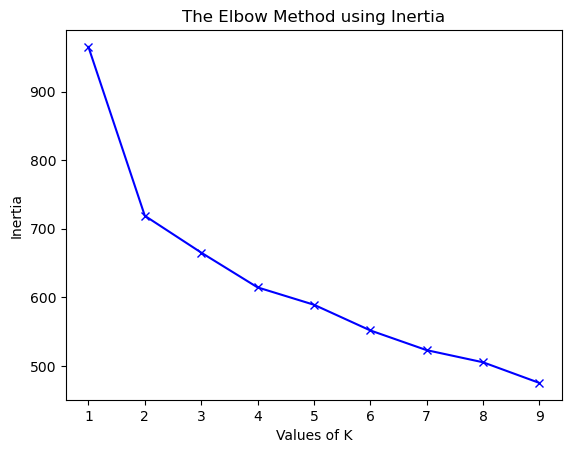

In [40]:
## Elbow Curve to get optimal number of clusters
import numpy as np
np.random.seed(22)

import random
random.seed(22)

inertias = []
   
K=range(1,10)
for k in K:
    kmean1 = KMeans(n_clusters=k).fit(data_scaled)
    kmean1.fit(data_scaled)
    inertias.append(kmean1.inertia_)

import matplotlib.pyplot as plt
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


#### Silhoutte Method

/Users/sophiagray/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sophiagray/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sophiagray/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sophiagray/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

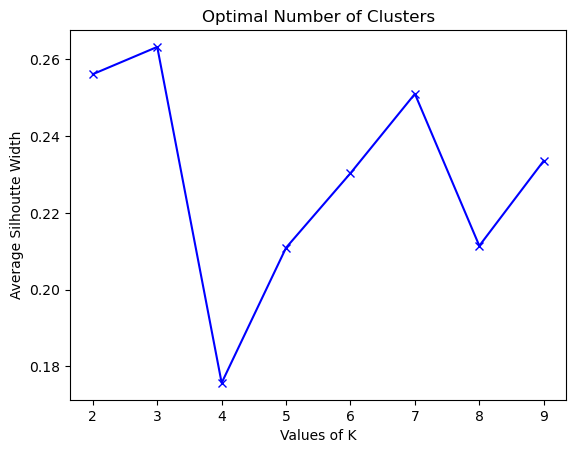

In [52]:
## Silhoutte Coefficient to get optimal number

from sklearn.metrics import silhouette_score

import numpy as np
np.random.seed(22)

import random
random.seed(22)

silhouette_coefficients = []
   
K=range(2,10)
for k in K:
    kmean1 = KMeans(n_clusters=k).fit(data_scaled)
    kmean1.fit(data_scaled)
    label = kmean1.labels_
    score = silhouette_score(data_scaled, label)
    silhouette_coefficients.append(score)

import matplotlib.pyplot as plt
plt.plot(K, silhouette_coefficients, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Average Silhoutte Width')
plt.title('Optimal Number of Clusters')
plt.show()

### Build K-Means Model

In [54]:
## K-Means

np.random.seed(22)
random.seed(22)

true_k = 3 # use 3 clusters

model = KMeans(n_clusters=true_k, init="random",max_iter=300, n_init=10, random_state=22)
model.fit(data_scaled)

KMeans(init='random', n_clusters=3, n_init=10, random_state=22)

### Visualize clusters via PCA

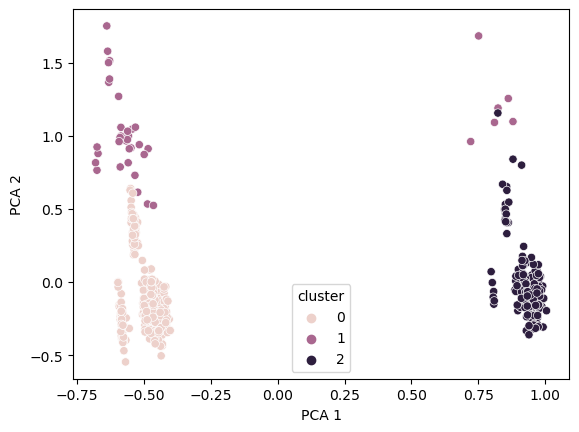

In [55]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=22)

# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=pca_vecs, columns=['PCA 1', 'PCA 2'])
pca_df['cluster'] = model.labels_

sns.scatterplot(x="PCA 1",y="PCA 2",hue="cluster",data=pca_df)
plt.show()



In [61]:
pca_df

,PCA 1,PCA 2,cluster
0,-0.472412,-0.201611,0
1,0.938396,-0.116701,2
2,-0.470606,-0.179245,0
3,-0.463718,-0.317666,0
4,-0.543339,0.338378,0
...,...,...,...
525,0.964425,-0.159356,2
526,-0.425418,-0.033493,0
527,0.918346,0.050355,2
528,-0.639464,1.751340,1


### Inspect clusters

In [71]:
screening_playlist['cluster'] = model.labels_

In [57]:
clus0 = screening_playlist[screening_playlist['cluster'] == 0]
clus0

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,Cupid De Locke - Remastered 2012,7zwwvrJAWGjfc9wFD3bVzZ,0.400,0.677,8,-10.971,1,0.0336,0.396000,0.1190,0.393,183.614,170280,4,0
2,Noah Kahan,Stick Season,Stick Season,0mflMxspEfB0VbI1kyLiAv,0.662,0.488,9,-6.894,1,0.0682,0.000000,0.1020,0.817,117.913,182347,4,0
3,Taylor Swift,1989 (Taylor's Version),New Romantics (Taylor's Version),2vPMoMDXxu9uX1igWZmXSG,0.651,0.855,5,-5.959,1,0.0538,0.000010,0.0759,0.698,121.980,230178,4,0
4,SiR,Chasing Summer,You Can't Save Me,1OykBmq3vmMSEOQShNIBLv,0.623,0.584,0,-7.902,1,0.1200,0.000168,0.1190,0.546,157.986,174947,4,0
5,The Neighbourhood,Chip Chrome & The Mono-Tones,Cherry Flavoured,40iocOzytrqaRn5RbGPDNp,0.617,0.574,6,-9.768,1,0.0276,0.010500,0.0983,0.396,91.769,208453,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,UMI,Pretty Girl hi!,Pretty Girl hi!,2Mee0OQcf0X2059JwUd4Vj,0.611,0.766,0,-6.201,1,0.1320,0.000041,0.0868,0.407,157.831,112413,4,0
520,Raveena,Moonstone EP,Close 2 U,7rgvhF2a3WjRkRtx2lndyc,0.758,0.337,0,-9.776,1,0.0494,0.000019,0.1650,0.368,93.010,239835,4,0
521,Dre'es,Warm (feat. Mia),Warm (feat. Mia),3kBofOTKMUZ62a311eUwvx,0.662,0.297,8,-14.525,1,0.0301,0.108000,0.1190,0.434,94.023,255466,4,0
522,Ralph Castelli,Morning Sex,Morning Sex,2fGRJzoiYJYAzlQAyBONMb,0.810,0.353,6,-9.536,1,0.0437,0.000104,0.0820,0.731,124.991,175313,4,0


In [58]:
clus1 = screening_playlist[screening_playlist['cluster'] == 1]
clus1

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
26,quinnie,flounder (deluxe),man,7n6WQH9VlJsELJGFxsXUWx,0.493,0.4400,0,-8.735,1,0.0299,0.000004,0.3790,0.2060,136.014,238813,3,1
38,Palace,So Long Forever,Live Well,2H30WL3exSctlDC9GyRbD4,0.496,0.6440,2,-5.385,1,0.0269,0.000000,0.0695,0.4350,96.017,249840,3,1
51,Childish Gambino,"""Awaken, My Love!""",Me and Your Mama,4AFsRbaLKRWo3dDtjDFA2V,0.545,0.4420,5,-12.111,1,0.0352,0.027100,0.0664,0.2420,118.073,379227,3,1
57,Richy Mitch & The Coal Miners,RMCM,Evergreen,6me7F0aaZjwDo6RJ5MrfBD,0.555,0.2160,3,-11.661,1,0.0721,0.004160,0.1090,0.5040,79.109,87000,3,1
59,Racoma,Racoma,Get On,5zswblrM7mdQE0wjn2y9jv,0.531,0.2450,4,-7.491,1,0.0292,0.000000,0.1520,0.1560,134.933,197375,3,1
70,suisside,Dark Side Of The Moon,Dark Side Of The Moon,33iv4ikGd0KboI6xNPL80i,0.381,0.8160,10,-9.256,1,0.1960,0.000000,0.8590,0.2250,130.254,168572,3,1
78,ODESZA,The Last Goodbye,All My Life,6txjv1bYloEaQ65SainV1Y,0.303,0.6800,9,-5.318,1,0.0731,0.929000,0.8720,0.0397,118.581,192267,3,1
90,Labrinth,Never Felt So Alone,Never Felt So Alone,2NbsBSshscKIPRG3kwBbfo,0.436,0.4090,5,-4.438,1,0.0533,0.000166,0.3800,0.3630,98.357,160166,3,1
91,Roar,I Can't Handle Change,I Can't Handle Change,0I1eFRytp4XRhLCjT6tZm7,0.247,0.4380,5,-8.478,1,0.0358,0.000867,0.1110,0.3900,185.711,198213,3,1
100,Lana Del Rey,Summertime The Gershwin Version,Summertime The Gershwin Version,25Mld9UGdMqXYDU2x8l3ld,0.234,0.1140,11,-19.136,0,0.0366,0.003910,0.1030,0.2100,189.986,186000,3,1


In [59]:
clus2 = screening_playlist[screening_playlist['cluster'] == 2]
clus2

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
1,saturra,lovergirl,lovergirl,7G8NW1IfiuHgvJ8UfzyOWF,0.427,0.312,1,-18.109,0,0.0359,0.166000,0.1110,0.820,183.838,135883,4,2
6,Dominic Fike,"Don't Forget About Me, Demos",Westcoast Collective,7rNun2AyLu4u4rQpRt0iS9,0.682,0.571,1,-7.169,0,0.0271,0.007570,0.3390,0.539,91.970,107280,4,2
7,cassö,Prada (feat. D-Block Europe) [Acoustic Version],Prada (feat. D-Block Europe) - Acoustic Version,2wDIMdSObZX90KXcRQPjzC,0.530,0.274,5,-9.143,0,0.0338,0.000000,0.1200,0.398,109.413,133938,4,2
12,Black Eyed Peas,THE E.N.D. (THE ENERGY NEVER DIES),Meet Me Halfway,6wOYnPq1hPihRepcDClPUw,0.798,0.629,11,-6.857,0,0.0735,0.000023,0.3240,0.400,130.002,284373,4,2
13,Madonna,Confessions on a Dance Floor,Hung Up,3850dYVgOFIXJh5U4BFEWH,0.649,0.647,9,-7.695,0,0.0452,0.161000,0.0686,0.405,125.020,337733,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,WILLOW,WILLOW,Overthinking IT,2QXvhG5wkzZthF2OTMIaNz,0.369,0.665,0,-6.190,0,0.0695,0.013100,0.3700,0.323,95.885,327267,5,2
524,Brent Faiyaz,Dead Man Walking,Dead Man Walking,5VlTQnZO89Ioku8ssdbqJk,0.505,0.267,9,-13.763,0,0.0500,0.000000,0.0960,0.439,143.929,247080,4,2
525,SZA,Good Days,Good Days,3YJJjQPAbDT7mGpX3WtQ9A,0.436,0.655,1,-8.370,0,0.0583,0.000008,0.6880,0.412,121.002,279204,4,2
527,Masego,Lady Lady,Tadow,51rPRW8NjxZoWPPjnRGzHw,0.704,0.487,9,-6.407,0,0.0604,0.000086,0.1110,0.313,121.726,301893,4,2


## Create final df with playlist info and pca columns

In [77]:
## Add PCA df to original df
final_df = pd.concat([screening_playlist,pca_df],axis=1)

## Remove duplicated cluster column
final_df = final_df.T.drop_duplicates().T
final_df['cluster'] = final_df['cluster'] + 1


In [79]:
final_df['cluster'].unique()

array([1, 3, 2], dtype=object)

In [82]:
final_df

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster,PCA 1,PCA 2
0,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,Cupid De Locke - Remastered 2012,7zwwvrJAWGjfc9wFD3bVzZ,0.4,0.677,8,-10.971,1,0.0336,0.396,0.119,0.393,183.614,170280,4,1,-0.472412,-0.201611
1,saturra,lovergirl,lovergirl,7G8NW1IfiuHgvJ8UfzyOWF,0.427,0.312,1,-18.109,0,0.0359,0.166,0.111,0.82,183.838,135883,4,3,0.938396,-0.116701
2,Noah Kahan,Stick Season,Stick Season,0mflMxspEfB0VbI1kyLiAv,0.662,0.488,9,-6.894,1,0.0682,0.0,0.102,0.817,117.913,182347,4,1,-0.470606,-0.179245
3,Taylor Swift,1989 (Taylor's Version),New Romantics (Taylor's Version),2vPMoMDXxu9uX1igWZmXSG,0.651,0.855,5,-5.959,1,0.0538,0.00001,0.0759,0.698,121.98,230178,4,1,-0.463718,-0.317666
4,SiR,Chasing Summer,You Can't Save Me,1OykBmq3vmMSEOQShNIBLv,0.623,0.584,0,-7.902,1,0.12,0.000168,0.119,0.546,157.986,174947,4,1,-0.543339,0.338378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,SZA,Good Days,Good Days,3YJJjQPAbDT7mGpX3WtQ9A,0.436,0.655,1,-8.37,0,0.0583,0.000008,0.688,0.412,121.002,279204,4,3,0.964425,-0.159356
526,Raveena,Headaches,Headaches,4MNu1bSmyV3S4Y2MJMGrrP,0.442,0.528,10,-9.269,1,0.0562,0.029,0.0944,0.233,132.932,311537,4,1,-0.425418,-0.033493
527,Masego,Lady Lady,Tadow,51rPRW8NjxZoWPPjnRGzHw,0.704,0.487,9,-6.407,0,0.0604,0.000086,0.111,0.313,121.726,301893,4,3,0.918346,0.050355
528,Sergei Prokofiev,Prokofiev: Romeo & Juliet,"Romeo and Juliet, Op. 64 / Act 1: Dance Of The...",2LiWNkeUOAeibGxJKxmjsD,0.199,0.0677,0,-20.879,1,0.039,0.738,0.225,0.145,78.866,307827,3,2,-0.639464,1.75134


In [81]:
final_df.to_csv("final_screening_playlist.csv")